# PROJECT ON RETAIL

# 

## IMPORTING THE NECESSARY DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datetime import timedelta
from pandas import ExcelWriter

### Now Lets Import The Data

In [2]:
df=pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Lets Check The Shape OF The Data----
df.shape

(541909, 8)

In [5]:
# Now Lets Check The Data Info----
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# (A) Data Cleaning

### Lets Find The Missing Values First-----

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Calculating The Missing Values Percentage-----
df_null= round((df.isnull().sum()/len(df))*100,2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
# As we can see two columns in data have missing values.

# Description - 0.27% (1454)
# CustomerID - 24.93% (135080)

In [9]:
# We can simply drop the Description as the missing values are too small----
# But in the case of CustomerID it is comparatively a large data but as it is a unquie key column we can fill.

In [10]:
df = df.dropna()

In [11]:
df.shape

(406829, 8)

### Removing The Duplicate Values

In [12]:
df = df.drop_duplicates()
df.shape

(401604, 8)

###  Perform descriptive anaylysis on the given data

In [13]:
# We can drop Description feature from our data since it is not not going to contribute in our Machine Building model.
df = df.drop('Description', axis=1)
df = df.dropna()
df.shape

(401604, 7)

#### CustomerID is 'float64', changing the datatype of CustomerId to string as Customer ID as numerical data does not make sense

In [14]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [15]:
df.describe(datetime_is_numeric=True)

,Quantity,InvoiceDate,UnitPrice
count,401604.000000,401604,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064
min,-80995.000000,2010-12-01 08:26:00,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000
50%,5.000000,2011-07-29 15:40:00,1.950000
75%,12.000000,2011-10-20 11:58:30,3.750000
max,80995.000000,2011-12-09 12:50:00,38970.000000
std,250.283037,NaN,69.764035


 * Quantity: Average quantity of each product in transaction is 12.18. Also note that minimum value in Quantity column is negative. This implies that some customers had returned the product during our period of analysis.
* InvoiceDate: Our data has transaction between 01-12-2010 to 09-12-2011
 * UnitPrice: Average price of each product in transactions is 3.47

In [16]:
# For Non-numeric Functions
df.describe(include=['O'])

,InvoiceNo,StockCode,CustomerID,Country
count,401604,401604,401604,401604
unique,22190,3684,4372,37
top,576339,85123A,17841.0,United Kingdom
freq,542,2065,7812,356728


* InvoiceNo: Total entries in preprocessed data are 4,01,602 but transactions are 22,190. Most number of entries are in Invoice No. '576339' that is 542 .
* StockCode: There are total 3684 unique products in our data and product with stock code '85123A' appears most frequently (2065 times) in our data.
* CustomerID: There are 4372 unique customers in our final preprocessed data. Customer with ID '17841' appears most frequently in data (7812 times)
* Country: Company has customers across 37 countries. Most entries are from United Kingdom in our dataset (356726)

##  (B) Data Transformation

#### (2) Perform Cohort Analysis

* #### (a) Create month cohort of customers and analyze active customers in each cohort:

In [17]:
# Convert to InvoiceDate to Year-Month format
df['month_year'] = df['InvoiceDate'].dt.to_period('M')
df['month_year']

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-12
541905    2011-12
541906    2011-12
541907    2011-12
541908    2011-12
Name: month_year, Length: 401604, dtype: period[M]

In [18]:
df['month_year'].nunique()

13

In [19]:
month_cohort = df.groupby('month_year')['CustomerID'].nunique()
month_cohort

month_year
2010-12     948
2011-01     783
2011-02     798
2011-03    1020
2011-04     899
2011-05    1079
2011-06    1051
2011-07     993
2011-08     980
2011-09    1302
2011-10    1425
2011-11    1711
2011-12     686
Freq: M, Name: CustomerID, dtype: int64

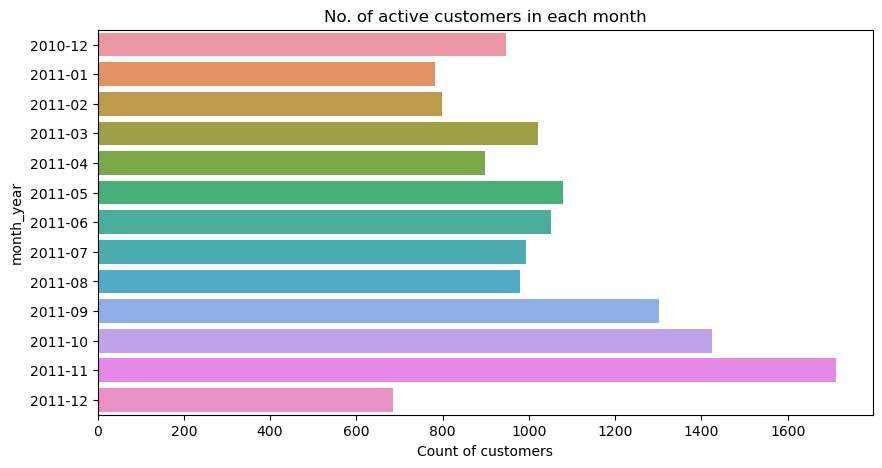

In [20]:
plt.figure(figsize=(10,5))
sns.barplot(y = month_cohort.index, x = month_cohort.values);
plt.xlabel("Count of customers")
plt.title("No. of active customers in each month")
plt.show()

* #### (b) Analyze the retention rate of customers:

In [21]:
retention_rate = round(month_cohort.pct_change(periods=1)*100,2)
retention_rate

month_year
2010-12      NaN
2011-01   -17.41
2011-02     1.92
2011-03    27.82
2011-04   -11.86
2011-05    20.02
2011-06    -2.59
2011-07    -5.52
2011-08    -1.31
2011-09    32.86
2011-10     9.45
2011-11    20.07
2011-12   -59.91
Freq: M, Name: CustomerID, dtype: float64

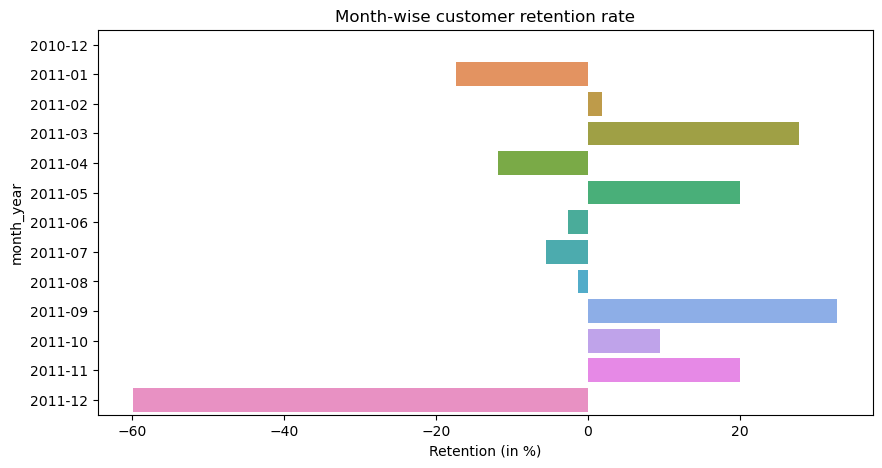

In [22]:
plt.figure(figsize=(10,5))
sns.barplot(y = retention_rate.index, x = retention_rate.values);
plt.xlabel("Retention (in %)")
plt.title("Month-wise customer retention rate");

# RFM Analysis

* ### Recency Analysis

In [23]:
# We will fix reference date for calculating recency as last transaction day in data + 1 day
ref_day = max(df['InvoiceDate']) + timedelta(days=1)
df['days_to_last_order'] = (ref_day - df['InvoiceDate']).dt.days
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,days_to_last_order
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,374
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,374
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,374
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,374
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,374


In [24]:
df_recency = df.groupby('CustomerID')['days_to_last_order'].min().reset_index()
df_recency

,CustomerID,days_to_last_order
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4367,18280.0,278
4368,18281.0,181
4369,18282.0,8
4370,18283.0,4


* ### Frequency Analysis:

In [25]:
df_frequency = df.groupby('CustomerID').nunique()['InvoiceNo'].reset_index()
df_frequency

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


* ### Monetary analysis:

In [26]:
df['amount'] = df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month_year,days_to_last_order,amount
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,374,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,374,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,374,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,374,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,374,20.34


In [27]:
df_monetary = df.groupby('CustomerID').sum()['amount'].reset_index()
df_monetary

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2045.53


### Calculate RFM metrics:

In [28]:
df_rf = pd.merge(df_recency, df_frequency,  on='CustomerID', how='inner')
df_rfm = pd.merge(df_rf, df_monetary, on='CustomerID', how='inner')
df_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
df_rfm.head()


,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


### Build RFM Segments:

newest    2734
newer      588
medium     416
older      353
oldest     281
Name: recency_labels, dtype: int64

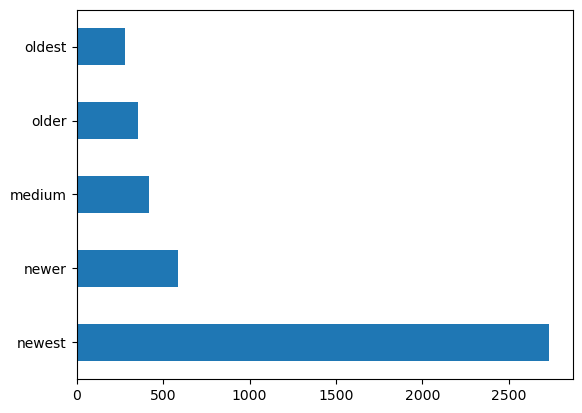

In [29]:
df_rfm['recency_labels'] = pd.cut(df_rfm['Recency'], bins=5,
                                     labels=['newest', 'newer', 'medium', 'older', 'oldest'])
df_rfm['recency_labels'].value_counts().plot(kind='barh');
df_rfm['recency_labels'].value_counts()

lowest     4348
lower        18
medium        3
highest       2
higher        1
Name: frequency_labels, dtype: int64

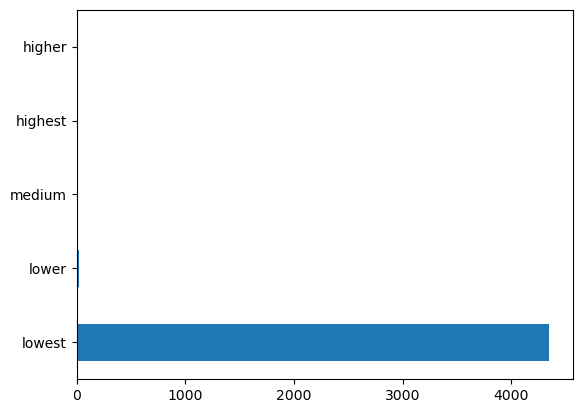

In [30]:
df_rfm['frequency_labels'] = pd.cut(df_rfm['Frequency'], bins=5, labels=['lowest', 'lower', 'medium', 'higher', 'highest'])
df_rfm['frequency_labels'].value_counts().plot(kind='barh');
df_rfm['frequency_labels'].value_counts()


smallest    4357
smaller        9
medium         3
largest        2
larger         1
Name: monetary_labels, dtype: int64

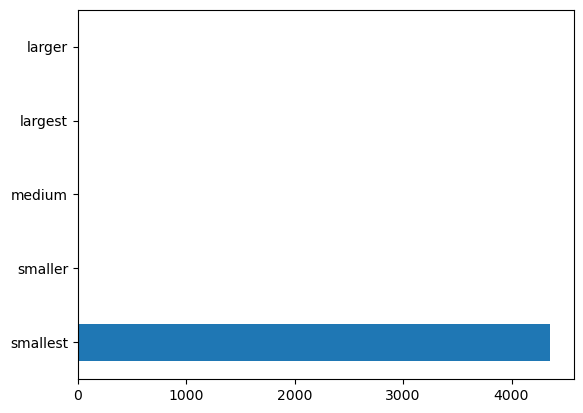

In [31]:
df_rfm['monetary_labels'] = pd.cut(df_rfm['Monetary'], bins=5, labels=['smallest', 'smaller', 'medium', 'larger', 'largest'])
df_rfm['monetary_labels'].value_counts().plot(kind='barh');
df_rfm['monetary_labels'].value_counts()

In [32]:
df_rfm['rfm_segment'] = df_rfm[['recency_labels','frequency_labels','monetary_labels']].agg('-'.join, axis=1)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest


### RFM Score:

In [33]:
recency_dict = {'newest': 5, 'newer':4, 'medium': 3, 'older':2, 'oldest':1}
frequency_dict = {'lowest':1, 'lower':2, 'medium': 3, 'higher':4, 'highest':5}
monetary_dict = {'smallest':1, 'smaller':2, 'medium': 3, 'larger':4, 'largest':5}

df_rfm['rfm_score'] = df_rfm['recency_labels'].map(recency_dict).astype(int)+ df_rfm['frequency_labels'].map(frequency_dict).astype(int) + df_rfm['monetary_labels'].map(monetary_dict).astype(int)
df_rfm.head(10)


,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest,7
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest,7
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest,7
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest,3
5,12352.0,36,11,1545.41,newest,lowest,smallest,newest-lowest-smallest,7
6,12353.0,204,1,89.00,medium,lowest,smallest,medium-lowest-smallest,5
7,12354.0,232,1,1079.40,older,lowest,smallest,older-lowest-smallest,4
8,12355.0,214,1,459.40,medium,lowest,smallest,medium-lowest-smallest,5
9,12356.0,23,3,2811.43,newest,lowest,smallest,newest-lowest-smallest,7


### Analyze RFM Segment and Score:

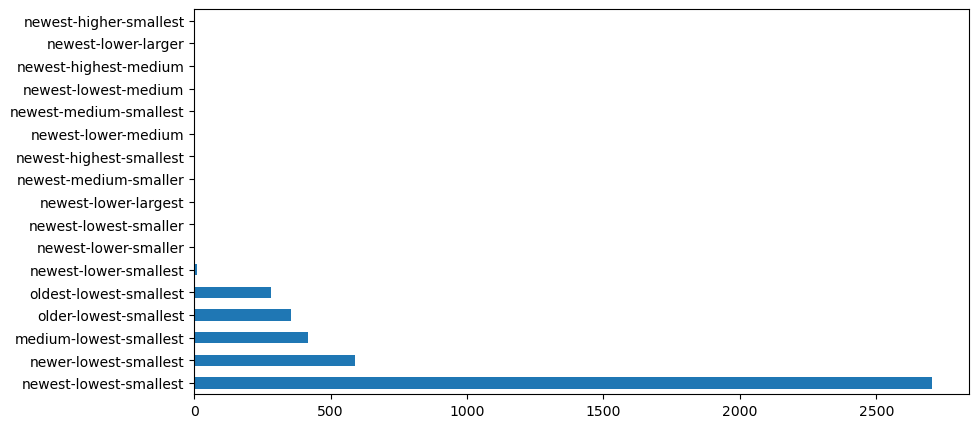

In [34]:
df_rfm['rfm_segment'].value_counts().plot(kind='barh', figsize=(10, 5));

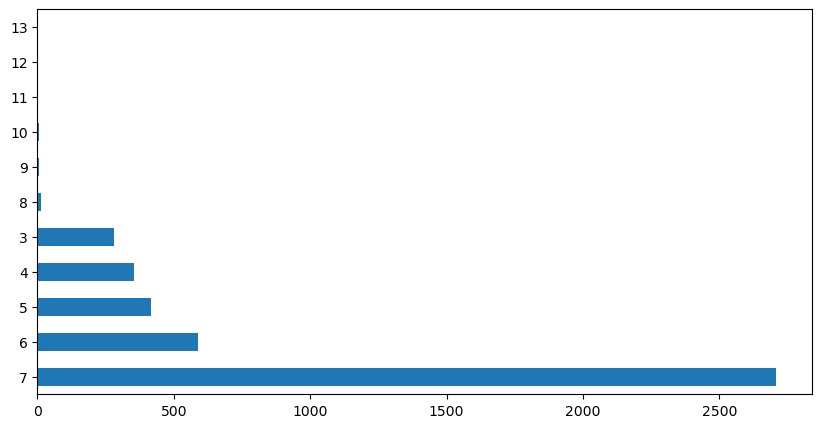

In [36]:
df_rfm['rfm_score'].value_counts().plot(kind='barh', figsize=(10, 5));

# Data Modeling:
### Create clusters using k-means clustering algorithm.

* a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

In [37]:
print(df_rfm.shape)
df_rfm.head()

(4372, 9)


,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest,7
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest,7
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest,7
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest,3


#### Standard Scalar Transformation

In [42]:
scaler = StandardScaler()

df_rfm_scaled = scaler.fit_transform(df_rfm[['Recency', 'Frequency', 'Monetary']])
df_rfm_scaled

df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
df_rfm_scaled.head()

,Recency,Frequency,Monetary
0,2.315110,-0.452915,-0.561869
1,-0.898130,0.412606,1.112411
2,-0.174159,-0.106706,0.136294
3,-0.729534,-0.626019,0.120876
4,2.156431,-0.626019,-0.431966


####  Build K-Means Clustering Model and Decide the optimum number of clusters to be formed.

In [43]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [46]:
kmeans.labels_

array([1, 0, 0, ..., 0, 0, 0])

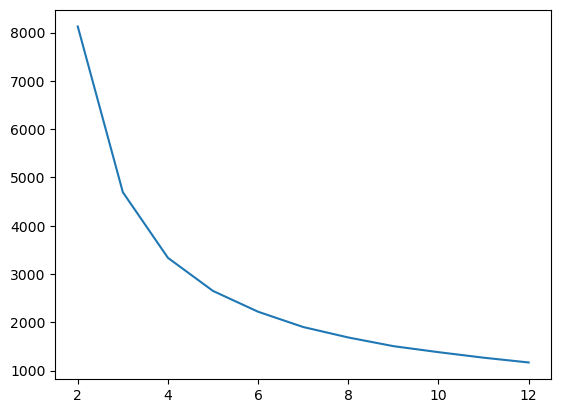

In [47]:
# Finding the Optimal Number of Clusters with the help of Elbow Curve/ SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(df_rfm_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters,ssd);

In [48]:
# Creating dataframe for exporting to create visualization in tableau later
df_inertia = pd.DataFrame(list(zip(range_n_clusters, ssd)), columns=['clusters', 'intertia'])
df_inertia

,clusters,intertia
0,2,8127.082877
1,3,4693.551481
2,4,3334.663585
3,5,2648.613205
4,6,2218.226480
5,7,1901.612620
6,8,1685.108063
7,9,1505.415573
8,10,1380.710050
9,11,1266.564772


In [49]:
# Finding the Optimal Number of Clusters with the help of Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_rfm_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(df_rfm_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6307483359906574
For n_clusters=3, the silhouette score is 0.5363959996360127
For n_clusters=4, the silhouette score is 0.5313451516062533
For n_clusters=5, the silhouette score is 0.49103268855197135
For n_clusters=6, the silhouette score is 0.44728831464768926
For n_clusters=7, the silhouette score is 0.42636750442858656
For n_clusters=8, the silhouette score is 0.42490374096739636
For n_clusters=9, the silhouette score is 0.43072614638261847
For n_clusters=10, the silhouette score is 0.36454664654449204


In [50]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

#### Analyze these clusters and comment on the results.



In [51]:
# assign the label
df_rfm['Cluster_Id'] = kmeans.labels_
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,recency_labels,frequency_labels,monetary_labels,rfm_segment,rfm_score,Cluster_Id
0,12346.0,326,2,0.00,oldest,lowest,smallest,oldest-lowest-smallest,3,1
1,12347.0,2,7,4310.00,newest,lowest,smallest,newest-lowest-smallest,7,0
2,12348.0,75,4,1797.24,newest,lowest,smallest,newest-lowest-smallest,7,0
3,12349.0,19,1,1757.55,newest,lowest,smallest,newest-lowest-smallest,7,0
4,12350.0,310,1,334.40,oldest,lowest,smallest,oldest-lowest-smallest,3,1


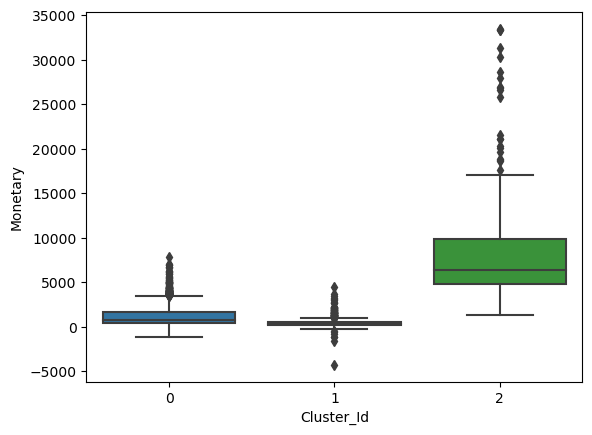

In [52]:
# Box plot to visualize Cluster Id vs Monetary
sns.boxplot(x='Cluster_Id', y='Monetary', data=df_rfm);

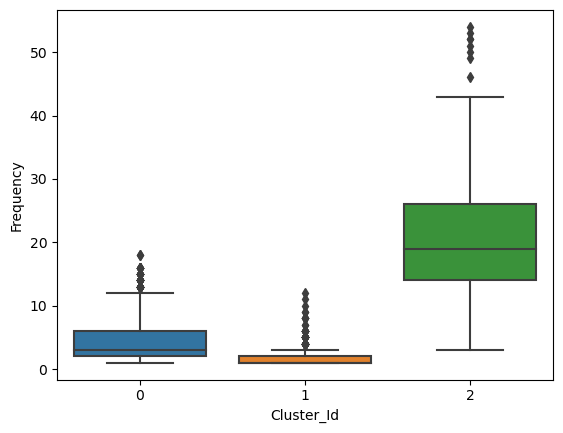

In [53]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='Frequency', data=df_rfm);

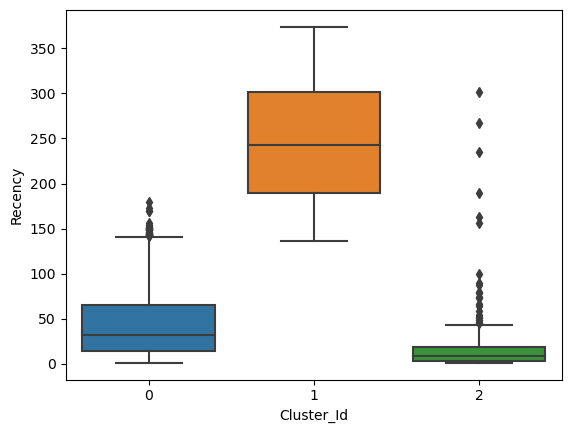

In [54]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='Recency', data=df_rfm);

# Data Reporting:

### Tableau link :-

* #### https://public.tableau.com/app/profile/akshaydeep.chauhan/viz/CapstoneProject-RetailPGP_16758572744860/Dashboard?publish=yes